In [78]:
import numpy as np
import pandas as pd
import os
import gc
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.listdir('./')

['.ipynb_checkpoints',
 'application_test.csv',
 'application_train.csv',
 'BUREAU_newfeats.csv',
 'CARD_newfeats.csv',
 'clean_manual.csv',
 'EXT_SOURCE_new.csv',
 'fi_clean_manual.csv',
 'HomeCredit_columns_description.csv',
 'MergeAllNewFeats.ipynb']

### 1. clean_manual.csv

In [3]:
clean_manual = pd.read_csv('clean_manual.csv')
clean_manual.head()

,SK_ID_CURR,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,...,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_ATM_CURRENT_mean_max,CC_CLIENT_CC_LOAN_AMT_PAYMENT_CURRENT_mean_min,CC_CLIENT_CC_LOAN_AMT_PAYMENT_CURRENT_mean_mean,CC_CLIENT_CC_LOAN_AMT_PAYMENT_CURRENT_mean_max,CC_CLIENT_CC_LOAN_AMT_PAYMENT_CURRENT_max_min,CC_CLIENT_CC_LOAN_AMT_PAYMENT_CURRENT_max_mean,CC_CLIENT_CC_LOAN_AMT_PAYMENT_CURRENT_max_max,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_ATM_CURRENT_max_min,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_ATM_CURRENT_max_mean,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_ATM_CURRENT_max_max
0,100002.0,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100003.0,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100004.0,6750.0,135000.0,135000.0,67500.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100006.0,29686.5,312682.5,297000.0,135000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007.0,21865.5,513000.0,513000.0,121500.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
clean_manual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356255 entries, 0 to 356254
Columns: 1462 entries, SK_ID_CURR to CC_CLIENT_CC_LOAN_AMT_DRAWINGS_ATM_CURRENT_max_max
dtypes: float64(1325), int64(137)
memory usage: 3.9 GB


In [5]:
fi_clean_manual = pd.read_csv('fi_clean_manual.csv',index_col=0)
fi_clean_manual.head()

,importance
feature,
LOAN_RATE,4254
DAYS_BIRTH,2747
EXT_SOURCE_MEAN,2696
EXT_SOURCE_3,2648
AMT_ANNUITY,2379


In [6]:
clean_manual_tmp = clean_manual.isnull().sum().sort_values(ascending=False)/len(clean_manual)
clean_manual_tmp

PREVIOUS_RATE_INTEREST_PRIVILEGED_max                     0.983941
PREVIOUS_RATE_INTEREST_PRIVILEGED_mean                    0.983941
PREVIOUS_RATE_INTEREST_PRIMARY_min                        0.983941
PREVIOUS_RATE_INTEREST_PRIMARY_max                        0.983941
PREVIOUS_RATE_INTEREST_PRIVILEGED_min                     0.983941
PREVIOUS_RATE_INTEREST_PRIMARY_mean                       0.983941
CC_CLIENT_CC_LOAN_AMT_PAYMENT_CURRENT_mean_max            0.826133
CC_CLIENT_CC_LOAN_AMT_PAYMENT_CURRENT_max_max             0.826133
CC_CLIENT_CC_LOAN_AMT_PAYMENT_CURRENT_min_min             0.826133
CC_CLIENT_CC_LOAN_AMT_PAYMENT_CURRENT_min_mean            0.826133
CC_CLIENT_CC_LOAN_AMT_PAYMENT_CURRENT_mean_mean           0.826133
CC_CLIENT_CC_LOAN_AMT_PAYMENT_CURRENT_min_max             0.826133
CC_CLIENT_CC_LOAN_AMT_PAYMENT_CURRENT_max_mean            0.826133
CC_CLIENT_CC_LOAN_AMT_PAYMENT_CURRENT_max_min             0.826133
CC_CLIENT_CC_LOAN_AMT_PAYMENT_CURRENT_mean_min            0.82

In [7]:
null_drop = clean_manual_tmp[clean_manual_tmp>0.6].index.tolist()
len(null_drop)

474

In [8]:
clean_manual.drop(null_drop,axis=1,inplace=True)
clean_manual.head()

,SK_ID_CURR,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,...,CASH_CLIENT_CASH_LOAN_INSTALLMENTS_PAID_sum_max,CASH_CLIENT_CASH_LOAN_INSTALLMENTS_PAID_sum_sum,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_FUTURE_sum_min,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_FUTURE_sum_mean,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_FUTURE_sum_max,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_FUTURE_sum_sum,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_sum_min,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_sum_mean,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_sum_max,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_sum_sum
0,100002.0,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,...,171.0,171.0,285.0,285.000000,285.0,285.0,456.0,456.000000,456.0,456.0
1,100003.0,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,0.0,0.0,...,66.0,121.0,21.0,54.000000,78.0,162.0,48.0,94.333333,144.0,283.0
2,100004.0,6750.0,135000.0,135000.0,67500.0,0.0,0.0,0.0,0.0,0.0,...,6.0,6.0,9.0,9.000000,9.0,9.0,15.0,15.000000,15.0,15.0
3,100006.0,29686.5,312682.5,297000.0,135000.0,NaN,NaN,NaN,NaN,NaN,...,45.0,67.0,48.0,57.666667,75.0,173.0,50.0,80.000000,120.0,240.0
4,100007.0,21865.5,513000.0,513000.0,121500.0,0.0,0.0,0.0,0.0,0.0,...,153.0,420.0,55.0,118.400000,222.0,592.0,100.0,202.400000,312.0,1012.0


In [9]:
#通过特征重要度再筛选
fi_clean_manual_300 = fi_clean_manual[:300].index.tolist()
print(len(set(fi_clean_manual_300)&set(clean_manual.columns.tolist())))

286


In [10]:
clean_manual_need = clean_manual[list(set(fi_clean_manual_300)&set(clean_manual.columns.tolist()))]
clean_manual_need.head()

,BUREAU_CREDIT_ACTIVE_Closed_mean,PREVIOUS_NFLAG_INSURED_ON_APPROVAL_mean,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_max_sum,PREVIOUS_AMT_DOWN_PAYMENT_min,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_min_sum,BUREAU_DAYS_ENDDATE_FACT_mean,PREVIOUS_AMT_APPLICATION_max,PREVIOUS_NAME_PAYMENT_TYPE_XNA_mean,PREVIOUS_DAYS_DECISION_min,PREVIOUS_AMT_DIFFERENCE_sum,...,PREVIOUS_NAME_YIELD_GROUP_middle_mean,IN_CLIENT_IN_LOAN_NUM_INSTALMENT_NUMBER_mean_sum,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_FUTURE_min_max,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_max_max,APARTMENTS_MEDI,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_FUTURE_sum_min,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_FUTURE_mean_min,NAME_CONTRACT_TYPE_Cash loans,DEF_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE
0,0.75,0.000000,53093.745,0.00,24.0,-697.500000,179055.0,1.000000,-606.0,0.00,...,0.000000,10.00000,6.0,53093.745,0.0250,285.0,15.000000,1,2.0,2.0
1,0.75,0.666667,632140.335,0.00,25.0,-1097.333333,900000.0,0.333333,-2341.0,146263.50,...,0.666667,14.00000,1.0,560835.360,0.0968,21.0,2.625000,1,0.0,1.0
2,1.00,0.000000,10573.965,4860.00,3.0,-532.500000,24282.0,0.000000,-815.0,-4176.00,...,1.000000,2.00000,0.0,10573.965,NaN,9.0,2.250000,0,0.0,0.0
3,NaN,0.000000,735974.055,2693.34,18.0,NaN,688500.0,0.555556,-617.0,175430.16,...,0.111111,9.50000,3.0,691786.890,NaN,48.0,7.142857,1,0.0,2.0
4,1.00,0.600000,60661.845,3105.00,75.0,-783.000000,247500.0,0.166667,-2357.0,96651.00,...,0.500000,34.21978,13.0,22678.785,NaN,55.0,5.500000,1,0.0,0.0


In [11]:
#把原本就在这里面的去掉
HomeCredit_columns_description = pd.read_csv('HomeCredit_columns_description.csv',index_col=0)
HomeCredit_columns_description.head()

,Table,Row
1,application_{train|test}.csv,SK_ID_CURR
2,application_{train|test}.csv,TARGET
5,application_{train|test}.csv,NAME_CONTRACT_TYPE
6,application_{train|test}.csv,CODE_GENDER
7,application_{train|test}.csv,FLAG_OWN_CAR


In [12]:
inter_drop = set(HomeCredit_columns_description.Row.values.tolist())&set(clean_manual_need.columns.tolist())
len(inter_drop)

41

In [13]:
clean_manual_need.drop(inter_drop,axis=1,inplace=True)
clean_manual_need.head()

D:\SoftWares\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,BUREAU_CREDIT_ACTIVE_Closed_mean,PREVIOUS_NFLAG_INSURED_ON_APPROVAL_mean,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_max_sum,PREVIOUS_AMT_DOWN_PAYMENT_min,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_min_sum,BUREAU_DAYS_ENDDATE_FACT_mean,PREVIOUS_AMT_APPLICATION_max,PREVIOUS_NAME_PAYMENT_TYPE_XNA_mean,PREVIOUS_DAYS_DECISION_min,PREVIOUS_AMT_DIFFERENCE_sum,...,PREVIOUS_NAME_PRODUCT_TYPE_XNA_mean,IN_CLIENT_IN_LOAN_DAYS_ENTRY_PAYMENT_max_max,IN_CLIENT_IN_LOAN_DAYS_ENTRY_PAYMENT_sum_mean,PREVIOUS_NAME_YIELD_GROUP_middle_mean,IN_CLIENT_IN_LOAN_NUM_INSTALMENT_NUMBER_mean_sum,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_FUTURE_min_max,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_max_max,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_FUTURE_sum_min,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_FUTURE_mean_min,NAME_CONTRACT_TYPE_Cash loans
0,0.75,0.000000,53093.745,0.00,24.0,-697.500000,179055.0,1.000000,-606.0,0.00,...,1.000000,-49.0,-5993.000000,0.000000,10.00000,6.0,53093.745,285.0,15.000000,1
1,0.75,0.666667,632140.335,0.00,25.0,-1097.333333,900000.0,0.333333,-2341.0,146263.50,...,0.666667,-544.0,-11544.333333,0.666667,14.00000,1.0,560835.360,21.0,2.625000,1
2,1.00,0.000000,10573.965,4860.00,3.0,-532.500000,24282.0,0.000000,-815.0,-4176.00,...,1.000000,-727.0,-2285.000000,1.000000,2.00000,0.0,10573.965,9.0,2.250000,0
3,NaN,0.000000,735974.055,2693.34,18.0,NaN,688500.0,0.555556,-617.0,175430.16,...,0.555556,-12.0,-1448.666667,0.111111,9.50000,3.0,691786.890,48.0,7.142857,1
4,1.00,0.600000,60661.845,3105.00,75.0,-783.000000,247500.0,0.166667,-2357.0,96651.00,...,0.333333,-14.0,-13625.600000,0.500000,34.21978,13.0,22678.785,55.0,5.500000,1


In [14]:
#去掉相关性比较强的列
clean_manual_need.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356255 entries, 0 to 356254
Columns: 245 entries, BUREAU_CREDIT_ACTIVE_Closed_mean to NAME_CONTRACT_TYPE_Cash loans
dtypes: float64(239), int64(6)
memory usage: 665.9 MB


In [15]:
# Create correlation matrix
corr_matrix = clean_manual_need.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [16]:
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [17]:
to_drop

['CODE_GENDER_M',
 'PREVIOUS_DAYS_TERMINATION_max',
 'CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_FUTURE_mean_sum',
 'IN_CLIENT_IN_LOAN_DAYS_INSTALMENT_max_max',
 'PREVIOUS_DAYS_LAST_DUE_min',
 'PREVIOUS_DAYS_TERMINATION_min',
 'CASH_CLIENT_CASH_LOAN_MONTHS_BALANCE_mean_max',
 'CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_FUTURE_max_mean',
 'CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_mean_mean',
 'IN_CLIENT_IN_LOAN_AMT_INSTALMENT_sum_max',
 'CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_FUTURE_mean_mean',
 'CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_FUTURE_sum_max',
 'BUREAU_AMT_CREDIT_SUM_DEBT_max',
 'PREVIOUS_DAYS_LAST_DUE_mean',
 'CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_sum_mean',
 'IN_CLIENT_IN_LOAN_AMT_PAYMENT_mean_sum',
 'CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_FUTURE_sum_sum',
 'PREVIOUS_DAYS_LAST_DUE_1ST_VERSION_min',
 'PREVIOUS_NAME_PAYMENT_TYPE_Cash through the bank_mean',
 'IN_CLIENT_IN_LOAN_AMT_PAYMENT_max_sum',
 'PREVIOUS_AMT_CREDIT_max',
 'IN_CLIENT_IN_LOAN_DAYS_ENTRY_PAYMENT_count_mean',
 'PREVIOUS_AMT_APPLICATI

In [18]:
clean_manual_need.drop(to_drop,axis=1,inplace=True)
clean_manual_need.head()

D:\SoftWares\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,BUREAU_CREDIT_ACTIVE_Closed_mean,PREVIOUS_NFLAG_INSURED_ON_APPROVAL_mean,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_max_sum,PREVIOUS_AMT_DOWN_PAYMENT_min,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_min_sum,BUREAU_DAYS_ENDDATE_FACT_mean,PREVIOUS_AMT_APPLICATION_max,PREVIOUS_NAME_PAYMENT_TYPE_XNA_mean,PREVIOUS_DAYS_DECISION_min,PREVIOUS_AMT_DIFFERENCE_sum,...,PREVIOUS_AMT_DOWN_PAYMENT_mean,PREVIOUS_DAYS_DECISION_mean,PREVIOUS_WEEKDAY_APPR_PROCESS_START_MONDAY_mean,PREVIOUS_CODE_REJECT_REASON_XAP_mean,IN_CLIENT_IN_LOAN_NUM_INSTALMENT_VERSION_max_mean,PREVIOUS_NAME_PRODUCT_TYPE_XNA_mean,PREVIOUS_NAME_YIELD_GROUP_middle_mean,IN_CLIENT_IN_LOAN_NUM_INSTALMENT_NUMBER_mean_sum,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_FUTURE_mean_min,NAME_CONTRACT_TYPE_Cash loans
0,0.75,0.000000,53093.745,0.00,24.0,-697.500000,179055.0,1.000000,-606.0,0.00,...,0.00,-606.000000,0.000000,1.000000,2.000000,1.000000,0.000000,10.00000,15.000000,1
1,0.75,0.666667,632140.335,0.00,25.0,-1097.333333,900000.0,0.333333,-2341.0,146263.50,...,3442.50,-1305.000000,0.000000,1.000000,1.333333,0.666667,0.666667,14.00000,2.625000,1
2,1.00,0.000000,10573.965,4860.00,3.0,-532.500000,24282.0,0.000000,-815.0,-4176.00,...,4860.00,-815.000000,0.000000,1.000000,2.000000,1.000000,1.000000,2.00000,2.250000,0
3,NaN,0.000000,735974.055,2693.34,18.0,NaN,688500.0,0.555556,-617.0,175430.16,...,34840.17,-272.444444,0.000000,0.888889,1.666667,0.555556,0.111111,9.50000,7.142857,1
4,1.00,0.600000,60661.845,3105.00,75.0,-783.000000,247500.0,0.166667,-2357.0,96651.00,...,3390.75,-1222.833333,0.166667,1.000000,1.200000,0.333333,0.500000,34.21978,5.500000,1


In [19]:
clean_manual_need.shape

(356255, 192)

In [20]:
clean_manual_need.head()

,BUREAU_CREDIT_ACTIVE_Closed_mean,PREVIOUS_NFLAG_INSURED_ON_APPROVAL_mean,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_max_sum,PREVIOUS_AMT_DOWN_PAYMENT_min,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_min_sum,BUREAU_DAYS_ENDDATE_FACT_mean,PREVIOUS_AMT_APPLICATION_max,PREVIOUS_NAME_PAYMENT_TYPE_XNA_mean,PREVIOUS_DAYS_DECISION_min,PREVIOUS_AMT_DIFFERENCE_sum,...,PREVIOUS_AMT_DOWN_PAYMENT_mean,PREVIOUS_DAYS_DECISION_mean,PREVIOUS_WEEKDAY_APPR_PROCESS_START_MONDAY_mean,PREVIOUS_CODE_REJECT_REASON_XAP_mean,IN_CLIENT_IN_LOAN_NUM_INSTALMENT_VERSION_max_mean,PREVIOUS_NAME_PRODUCT_TYPE_XNA_mean,PREVIOUS_NAME_YIELD_GROUP_middle_mean,IN_CLIENT_IN_LOAN_NUM_INSTALMENT_NUMBER_mean_sum,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_FUTURE_mean_min,NAME_CONTRACT_TYPE_Cash loans
0,0.75,0.000000,53093.745,0.00,24.0,-697.500000,179055.0,1.000000,-606.0,0.00,...,0.00,-606.000000,0.000000,1.000000,2.000000,1.000000,0.000000,10.00000,15.000000,1
1,0.75,0.666667,632140.335,0.00,25.0,-1097.333333,900000.0,0.333333,-2341.0,146263.50,...,3442.50,-1305.000000,0.000000,1.000000,1.333333,0.666667,0.666667,14.00000,2.625000,1
2,1.00,0.000000,10573.965,4860.00,3.0,-532.500000,24282.0,0.000000,-815.0,-4176.00,...,4860.00,-815.000000,0.000000,1.000000,2.000000,1.000000,1.000000,2.00000,2.250000,0
3,NaN,0.000000,735974.055,2693.34,18.0,NaN,688500.0,0.555556,-617.0,175430.16,...,34840.17,-272.444444,0.000000,0.888889,1.666667,0.555556,0.111111,9.50000,7.142857,1
4,1.00,0.600000,60661.845,3105.00,75.0,-783.000000,247500.0,0.166667,-2357.0,96651.00,...,3390.75,-1222.833333,0.166667,1.000000,1.200000,0.333333,0.500000,34.21978,5.500000,1


In [21]:
gc.enable()
del clean_manual,corr_matrix,clean_manual_tmp
gc.collect()

0

### 2. 'EXT_SOURCE_new.csv'

In [43]:
application_train = pd.read_csv('application_train.csv')
application_test = pd.read_csv('application_test.csv')

In [44]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
application_test.shape

(48744, 121)

In [46]:
application_train.drop('TARGET',axis=1,inplace=True)
application_train.shape

(307511, 121)

In [47]:
alldata = application_train.append(application_test)
alldata.reset_index(drop=True,inplace=True)
print(alldata.shape)
alldata.head()

(356255, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
gc.enable()
del application_train,application_test
gc.collect()

0

In [49]:
alldata['DAYS_EMPLOYED'] = (alldata['DAYS_EMPLOYED'].apply(lambda x: x if x != 365243 else np.nan))

In [50]:
def feat_ext_source(df):
    df_new = pd.DataFrame()
    x1 = df['EXT_SOURCE_1'].fillna(-1) + 1e-1
    x2 = df['EXT_SOURCE_2'].fillna(-1) + 1e-1
    x3 = df['EXT_SOURCE_3'].fillna(-1) + 1e-1
    
    df_new['EXT_SOURCE_1over2_NAminus1_Add0.1'] = x1/x2
    df_new['EXT_SOURCE_2over1_NAminus1_Add0.1'] = x2/x1
    df_new['EXT_SOURCE_1over3_NAminus1_Add0.1'] = x1/x3
    df_new['EXT_SOURCE_3over1_NAminus1_Add0.1'] = x3/x1
    df_new['EXT_SOURCE_2over3_NAminus1_Add0.1'] = x2/x3
    df_new['EXT_SOURCE_3over2_NAminus1_Add0.1'] = x3/x2
    
    df_new['EXT_SOURCE_na1_2'] = (df['EXT_SOURCE_1'].isnull()) * (df['EXT_SOURCE_2'].fillna(0))
    df_new['EXT_SOURCE_na1_3'] = (df['EXT_SOURCE_1'].isnull()) * (df['EXT_SOURCE_3'].fillna(0))
    df_new['EXT_SOURCE_na2_1'] = (df['EXT_SOURCE_2'].isnull()) * (df['EXT_SOURCE_1'].fillna(0))
    df_new['EXT_SOURCE_na2_3'] = (df['EXT_SOURCE_2'].isnull()) * (df['EXT_SOURCE_3'].fillna(0))
    df_new['EXT_SOURCE_na3_1'] = (df['EXT_SOURCE_3'].isnull()) * (df['EXT_SOURCE_1'].fillna(0))
    df_new['EXT_SOURCE_na3_2'] = (df['EXT_SOURCE_3'].isnull()) * (df['EXT_SOURCE_2'].fillna(0))
    
    return df_new

In [51]:
alldata_new = feat_ext_source(alldata)
alldata_new.head()

,EXT_SOURCE_1over2_NAminus1_Add0.1,EXT_SOURCE_2over1_NAminus1_Add0.1,EXT_SOURCE_1over3_NAminus1_Add0.1,EXT_SOURCE_3over1_NAminus1_Add0.1,EXT_SOURCE_2over3_NAminus1_Add0.1,EXT_SOURCE_3over2_NAminus1_Add0.1,EXT_SOURCE_na1_2,EXT_SOURCE_na1_3,EXT_SOURCE_na2_1,EXT_SOURCE_na2_3,EXT_SOURCE_na3_1,EXT_SOURCE_na3_2
0,0.504305,1.982925,0.764643,1.307800,1.516229,0.659531,0.000000,0.000000,0.0,0.0,0.000000,0.000000
1,0.569428,1.756147,-0.456964,-2.188358,-0.802495,-1.246113,0.000000,0.000000,0.0,0.0,0.311267,0.622246
2,-1.372135,-0.728791,-1.084904,-0.921741,0.790668,1.264753,0.555912,0.729567,0.0,0.0,0.000000,0.000000
3,-1.199294,-0.833824,1.000000,1.000000,-0.833824,-1.199294,0.650442,0.000000,0.0,0.0,0.000000,0.650442
4,-2.128977,-0.469709,1.000000,1.000000,-0.469709,-2.128977,0.322738,0.000000,0.0,0.0,0.000000,0.322738


In [52]:
alldata.shape

(356255, 121)

In [53]:
alldata_new['SK_ID_CURR'] = alldata['SK_ID_CURR']
alldata_new.head()

,EXT_SOURCE_1over2_NAminus1_Add0.1,EXT_SOURCE_2over1_NAminus1_Add0.1,EXT_SOURCE_1over3_NAminus1_Add0.1,EXT_SOURCE_3over1_NAminus1_Add0.1,EXT_SOURCE_2over3_NAminus1_Add0.1,EXT_SOURCE_3over2_NAminus1_Add0.1,EXT_SOURCE_na1_2,EXT_SOURCE_na1_3,EXT_SOURCE_na2_1,EXT_SOURCE_na2_3,EXT_SOURCE_na3_1,EXT_SOURCE_na3_2,SK_ID_CURR
0,0.504305,1.982925,0.764643,1.307800,1.516229,0.659531,0.000000,0.000000,0.0,0.0,0.000000,0.000000,100002
1,0.569428,1.756147,-0.456964,-2.188358,-0.802495,-1.246113,0.000000,0.000000,0.0,0.0,0.311267,0.622246,100003
2,-1.372135,-0.728791,-1.084904,-0.921741,0.790668,1.264753,0.555912,0.729567,0.0,0.0,0.000000,0.000000,100004
3,-1.199294,-0.833824,1.000000,1.000000,-0.833824,-1.199294,0.650442,0.000000,0.0,0.0,0.000000,0.650442,100006
4,-2.128977,-0.469709,1.000000,1.000000,-0.469709,-2.128977,0.322738,0.000000,0.0,0.0,0.000000,0.322738,100007


In [54]:
alldata_new = pd.concat([alldata_new,clean_manual_need],axis=1)

In [55]:
alldata_new.head()

,EXT_SOURCE_1over2_NAminus1_Add0.1,EXT_SOURCE_2over1_NAminus1_Add0.1,EXT_SOURCE_1over3_NAminus1_Add0.1,EXT_SOURCE_3over1_NAminus1_Add0.1,EXT_SOURCE_2over3_NAminus1_Add0.1,EXT_SOURCE_3over2_NAminus1_Add0.1,EXT_SOURCE_na1_2,EXT_SOURCE_na1_3,EXT_SOURCE_na2_1,EXT_SOURCE_na2_3,...,PREVIOUS_AMT_DOWN_PAYMENT_mean,PREVIOUS_DAYS_DECISION_mean,PREVIOUS_WEEKDAY_APPR_PROCESS_START_MONDAY_mean,PREVIOUS_CODE_REJECT_REASON_XAP_mean,IN_CLIENT_IN_LOAN_NUM_INSTALMENT_VERSION_max_mean,PREVIOUS_NAME_PRODUCT_TYPE_XNA_mean,PREVIOUS_NAME_YIELD_GROUP_middle_mean,IN_CLIENT_IN_LOAN_NUM_INSTALMENT_NUMBER_mean_sum,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_FUTURE_mean_min,NAME_CONTRACT_TYPE_Cash loans
0,0.504305,1.982925,0.764643,1.307800,1.516229,0.659531,0.000000,0.000000,0.0,0.0,...,0.00,-606.000000,0.000000,1.000000,2.000000,1.000000,0.000000,10.00000,15.000000,1
1,0.569428,1.756147,-0.456964,-2.188358,-0.802495,-1.246113,0.000000,0.000000,0.0,0.0,...,3442.50,-1305.000000,0.000000,1.000000,1.333333,0.666667,0.666667,14.00000,2.625000,1
2,-1.372135,-0.728791,-1.084904,-0.921741,0.790668,1.264753,0.555912,0.729567,0.0,0.0,...,4860.00,-815.000000,0.000000,1.000000,2.000000,1.000000,1.000000,2.00000,2.250000,0
3,-1.199294,-0.833824,1.000000,1.000000,-0.833824,-1.199294,0.650442,0.000000,0.0,0.0,...,34840.17,-272.444444,0.000000,0.888889,1.666667,0.555556,0.111111,9.50000,7.142857,1
4,-2.128977,-0.469709,1.000000,1.000000,-0.469709,-2.128977,0.322738,0.000000,0.0,0.0,...,3390.75,-1222.833333,0.166667,1.000000,1.200000,0.333333,0.500000,34.21978,5.500000,1


In [56]:
del clean_manual_need
gc.collect()

7

### 3. 'BUREAU_newfeats.csv'

In [58]:
BUREAU_newfeats = pd.read_csv('BUREAU_newfeats.csv',index_col=0)
BUREAU_newfeats.head()

,SK_ID_CURR,BUREAU_LOAN_COUNT,BUREAU_LOAN_TYPES,AVERAGE_LOAN_TYPE,ACTIVE_LOANS_PERCENTAGE,CREDIT_ENDDATE_PERCENTAGE,AVG_ENDDATE_FUTURE,DEBT_CREDIT_RATIO,OVERDUE_DEBT_RATIO,AVG_CREDITDAYS_PROLONGED
0,100001,7,1,7.0,0.428571,0.428571,455.666667,0.410555,0.0,0.0
1,100002,8,2,4.0,0.250000,0.625000,143.600000,0.284122,0.0,0.0
2,100003,4,2,2.0,0.250000,0.250000,0.000000,0.000000,NaN,0.0
3,100004,2,1,2.0,0.000000,0.000000,NaN,0.000000,NaN,0.0
4,100005,3,2,1.5,0.666667,0.666667,601.000000,0.864992,0.0,0.0


In [59]:
alldata_new = alldata_new.merge(BUREAU_newfeats,on='SK_ID_CURR',how='left')
alldata_new.head()

,EXT_SOURCE_1over2_NAminus1_Add0.1,EXT_SOURCE_2over1_NAminus1_Add0.1,EXT_SOURCE_1over3_NAminus1_Add0.1,EXT_SOURCE_3over1_NAminus1_Add0.1,EXT_SOURCE_2over3_NAminus1_Add0.1,EXT_SOURCE_3over2_NAminus1_Add0.1,EXT_SOURCE_na1_2,EXT_SOURCE_na1_3,EXT_SOURCE_na2_1,EXT_SOURCE_na2_3,...,NAME_CONTRACT_TYPE_Cash loans,BUREAU_LOAN_COUNT,BUREAU_LOAN_TYPES,AVERAGE_LOAN_TYPE,ACTIVE_LOANS_PERCENTAGE,CREDIT_ENDDATE_PERCENTAGE,AVG_ENDDATE_FUTURE,DEBT_CREDIT_RATIO,OVERDUE_DEBT_RATIO,AVG_CREDITDAYS_PROLONGED
0,0.504305,1.982925,0.764643,1.307800,1.516229,0.659531,0.000000,0.000000,0.0,0.0,...,1,8.0,2.0,4.0,0.25,0.625,143.6,0.284122,0.0,0.0
1,0.569428,1.756147,-0.456964,-2.188358,-0.802495,-1.246113,0.000000,0.000000,0.0,0.0,...,1,4.0,2.0,2.0,0.25,0.250,0.0,0.000000,NaN,0.0
2,-1.372135,-0.728791,-1.084904,-0.921741,0.790668,1.264753,0.555912,0.729567,0.0,0.0,...,0,2.0,1.0,2.0,0.00,0.000,NaN,0.000000,NaN,0.0
3,-1.199294,-0.833824,1.000000,1.000000,-0.833824,-1.199294,0.650442,0.000000,0.0,0.0,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-2.128977,-0.469709,1.000000,1.000000,-0.469709,-2.128977,0.322738,0.000000,0.0,0.0,...,1,1.0,1.0,1.0,0.00,0.000,NaN,0.000000,NaN,0.0


### 4.'CARD_newfeats.csv'

In [60]:
CARD_newfeats = pd.read_csv('CARD_newfeats.csv',index_col=0)
CARD_newfeats.head()

,SK_ID_CURR,NO_LOANS,TOTAL_INSTALMENTS,INSTALLMENTS_PER_LOAN,CREDIT_LOAD,DPD_COUNT,AVG_DPD,PERCENTAGE_MISSED_PAYMENTS,CASH_CARD_RATIO,DRAWINGS_RATIO
0,100006,1,0.0,0,0.000000,0.0,0.000000,0.000000,NaN,NaN
1,100011,1,33.0,33,0.525000,0.0,0.000000,0.000000,100.0,4.500000e+06
2,100013,1,22.0,22,0.512445,1.0,0.010417,1.041667,100.0,2.484783e+06
3,100021,1,0.0,0,0.000000,0.0,0.000000,0.000000,NaN,NaN
4,100023,1,0.0,0,0.000000,0.0,0.000000,0.000000,NaN,NaN


In [61]:
alldata_new = alldata_new.merge(CARD_newfeats,on='SK_ID_CURR',how='left')
alldata_new.head()

,EXT_SOURCE_1over2_NAminus1_Add0.1,EXT_SOURCE_2over1_NAminus1_Add0.1,EXT_SOURCE_1over3_NAminus1_Add0.1,EXT_SOURCE_3over1_NAminus1_Add0.1,EXT_SOURCE_2over3_NAminus1_Add0.1,EXT_SOURCE_3over2_NAminus1_Add0.1,EXT_SOURCE_na1_2,EXT_SOURCE_na1_3,EXT_SOURCE_na2_1,EXT_SOURCE_na2_3,...,AVG_CREDITDAYS_PROLONGED,NO_LOANS,TOTAL_INSTALMENTS,INSTALLMENTS_PER_LOAN,CREDIT_LOAD,DPD_COUNT,AVG_DPD,PERCENTAGE_MISSED_PAYMENTS,CASH_CARD_RATIO,DRAWINGS_RATIO
0,0.504305,1.982925,0.764643,1.307800,1.516229,0.659531,0.000000,0.000000,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.569428,1.756147,-0.456964,-2.188358,-0.802495,-1.246113,0.000000,0.000000,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-1.372135,-0.728791,-1.084904,-0.921741,0.790668,1.264753,0.555912,0.729567,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-1.199294,-0.833824,1.000000,1.000000,-0.833824,-1.199294,0.650442,0.000000,0.0,0.0,...,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,-2.128977,-0.469709,1.000000,1.000000,-0.469709,-2.128977,0.322738,0.000000,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 5. 做一步的处理

In [62]:
alldata_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356255 entries, 0 to 356254
Columns: 223 entries, EXT_SOURCE_1over2_NAminus1_Add0.1 to DRAWINGS_RATIO
dtypes: float64(217), int64(6)
memory usage: 608.8 MB


In [63]:
alldata_new_tmp = alldata_new.isnull().sum().sort_values(ascending=False)/len(alldata_new)
alldata_new_tmp

CASH_CARD_RATIO                                       0.802768
DRAWINGS_RATIO                                        0.802762
CREDIT_LOAD                                           0.712007
PERCENTAGE_MISSED_PAYMENTS                            0.709315
TOTAL_INSTALMENTS                                     0.709315
NO_LOANS                                              0.709315
AVG_DPD                                               0.709315
INSTALLMENTS_PER_LOAN                                 0.709315
DPD_COUNT                                             0.709315
BUREAU_AMT_CREDIT_MAX_OVERDUE_max                     0.402198
OVERDUE_DEBT_RATIO                                    0.390580
AVG_ENDDATE_FUTURE                                    0.289374
BUREAU_DAYS_ENDDATE_FACT_max                          0.247298
BUREAU_DAYS_ENDDATE_FACT_mean                         0.247298
BUREAU_DAYS_ENDDATE_FACT_min                          0.247298
BUREAU_AMT_CREDIT_SUM_LIMIT_max                       0

In [69]:
# Create correlation matrix
corr_matrix = alldata_new.select_dtypes(include=['float64']).corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [74]:
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

In [75]:
to_drop

['CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_mean_sum',
 'CASH_CLIENT_CASH_LOAN_INSTALLMENTS_PAID_mean_sum',
 'PREVIOUS_AMT_GOODS_PRICE_sum',
 'IN_CLIENT_IN_LOAN_AMT_PAYMENT_max_max',
 'BUREAU_AMT_CREDIT_SUM_LIMIT_count',
 'IN_CLIENT_IN_LOAN_AMT_INSTALMENT_mean_sum',
 'CASH_CLIENT_CASH_LOAN_MONTHS_BALANCE_min_mean',
 'BUREAU_DAYS_CREDIT_sum',
 'PREVIOUS_AMT_GOODS_PRICE_mean',
 'IN_CLIENT_IN_LOAN_AMT_PAYMENT_min_min',
 'PREVIOUS_DAYS_LAST_DUE_1ST_VERSION_mean',
 'BUREAU_DAYS_CREDIT_UPDATE_sum',
 'CASH_CLIENT_CASH_LOAN_INSTALLMENTS_PAID_sum_sum',
 'PREVIOUS_CODE_REJECT_REASON_XAP_mean',
 'IN_CLIENT_IN_LOAN_NUM_INSTALMENT_VERSION_max_mean',
 'IN_CLIENT_IN_LOAN_NUM_INSTALMENT_NUMBER_mean_sum',
 'BUREAU_LOAN_COUNT',
 'ACTIVE_LOANS_PERCENTAGE',
 'INSTALLMENTS_PER_LOAN']

In [76]:
alldata_new.drop(to_drop,inplace=True,axis=1)
alldata_new.head()

,EXT_SOURCE_1over2_NAminus1_Add0.1,EXT_SOURCE_2over1_NAminus1_Add0.1,EXT_SOURCE_1over3_NAminus1_Add0.1,EXT_SOURCE_3over1_NAminus1_Add0.1,EXT_SOURCE_2over3_NAminus1_Add0.1,EXT_SOURCE_3over2_NAminus1_Add0.1,EXT_SOURCE_na1_2,EXT_SOURCE_na1_3,EXT_SOURCE_na2_1,EXT_SOURCE_na2_3,...,OVERDUE_DEBT_RATIO,AVG_CREDITDAYS_PROLONGED,NO_LOANS,TOTAL_INSTALMENTS,CREDIT_LOAD,DPD_COUNT,AVG_DPD,PERCENTAGE_MISSED_PAYMENTS,CASH_CARD_RATIO,DRAWINGS_RATIO
0,0.504305,1.982925,0.764643,1.307800,1.516229,0.659531,0.000000,0.000000,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.569428,1.756147,-0.456964,-2.188358,-0.802495,-1.246113,0.000000,0.000000,0.0,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-1.372135,-0.728791,-1.084904,-0.921741,0.790668,1.264753,0.555912,0.729567,0.0,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-1.199294,-0.833824,1.000000,1.000000,-0.833824,-1.199294,0.650442,0.000000,0.0,0.0,...,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,-2.128977,-0.469709,1.000000,1.000000,-0.469709,-2.128977,0.322738,0.000000,0.0,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


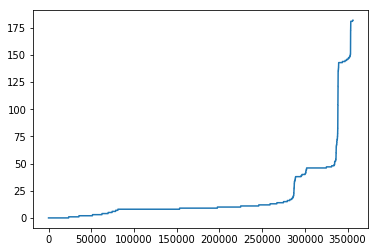

In [81]:
alldata_new.isnull().sum(axis=1).sort_values().reset_index(drop=True).plot()

In [82]:
alldata_new['NULLCOUNT'] = alldata_new.isnull().sum(axis=1)
alldata_new.head()

,EXT_SOURCE_1over2_NAminus1_Add0.1,EXT_SOURCE_2over1_NAminus1_Add0.1,EXT_SOURCE_1over3_NAminus1_Add0.1,EXT_SOURCE_3over1_NAminus1_Add0.1,EXT_SOURCE_2over3_NAminus1_Add0.1,EXT_SOURCE_3over2_NAminus1_Add0.1,EXT_SOURCE_na1_2,EXT_SOURCE_na1_3,EXT_SOURCE_na2_1,EXT_SOURCE_na2_3,...,AVG_CREDITDAYS_PROLONGED,NO_LOANS,TOTAL_INSTALMENTS,CREDIT_LOAD,DPD_COUNT,AVG_DPD,PERCENTAGE_MISSED_PAYMENTS,CASH_CARD_RATIO,DRAWINGS_RATIO,NULLCOUNT
0,0.504305,1.982925,0.764643,1.307800,1.516229,0.659531,0.000000,0.000000,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
1,0.569428,1.756147,-0.456964,-2.188358,-0.802495,-1.246113,0.000000,0.000000,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
2,-1.372135,-0.728791,-1.084904,-0.921741,0.790668,1.264753,0.555912,0.729567,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
3,-1.199294,-0.833824,1.000000,1.000000,-0.833824,-1.199294,0.650442,0.000000,0.0,0.0,...,NaN,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,40
4,-2.128977,-0.469709,1.000000,1.000000,-0.469709,-2.128977,0.322738,0.000000,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10


In [84]:
alldata_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356255 entries, 0 to 356254
Columns: 205 entries, EXT_SOURCE_1over2_NAminus1_Add0.1 to NULLCOUNT
dtypes: float64(198), int64(7)
memory usage: 559.9 MB


In [ ]:
alldata_new.to_csv('alldata_newfeats.csv')